# The Perfect Beer

### https://www.machinehack.com/course/how-to-choose-the-perfect-beer/

###### Import Statements

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

###### Load Beer Data

In [3]:
beer= pd.read_csv('../Data/Beer Train Data Set.csv')

##### See Imported Data

In [4]:
beer.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73


###### Checking basic health of data

In [5]:
beer.describe()

,ABV,Brewing Company,Beer Name,Score
count,170513.000000,185643.000000,185643.000000,185643.000000
mean,6.354961,7008.757659,83738.220111,3.198432
std,1.907205,3914.168053,48520.065146,1.358862
min,0.010000,0.000000,0.000000,0.000000
25%,5.000000,3825.000000,41232.500000,3.270000
50%,6.000000,7111.000000,83335.000000,3.710000
75%,7.200000,10402.000000,125148.500000,3.970000
max,80.000000,13541.000000,168534.000000,5.000000


##### Checking for nulls in data

In [6]:
beer.isnull().any()

ABV                     True
Brewing Company        False
Food Paring            False
Glassware Used         False
Beer Name              False
Ratings                False
Style Name             False
Cellar Temperature      True
Serving Temperature     True
Score                  False
dtype: bool

In [18]:
beer.dtypes

ABV                    float64
Brewing Company          int64
Food Paring             object
Glassware Used          object
Beer Name                int64
Ratings                 object
Style Name              object
Cellar Temperature      object
Serving Temperature     object
Score                  float64
dtype: object

In [7]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185643 entries, 0 to 185642
Data columns (total 10 columns):
ABV                    170513 non-null float64
Brewing Company        185643 non-null int64
Food Paring            185643 non-null object
Glassware Used         185643 non-null object
Beer Name              185643 non-null int64
Ratings                185643 non-null object
Style Name             185643 non-null object
Cellar Temperature     178862 non-null object
Serving Temperature    185450 non-null object
Score                  185643 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 14.2+ MB


Here we can see that **ABV, Cellar Temperature and Serving Temperature** have some missing values. We need to handle these 

In [8]:
beer['Food Paring'].value_counts().head()
beer['Brewing Company'].value_counts().head()
beer['Brewing Company'].value_counts(dropna=False).head()
beer['Brewing Company'].nunique()

13350

In [9]:
beer.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73


In [10]:
beer[beer['Brewing Company']==11688]

##type(beer.ABV)
beer[beer['Beer Name']==67447]
##beer[beer['ABV']==]
##trying to see of there is any relation bw ABV being null and other ones
beer[beer.ABV.isnull()].head()



,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00
23,NaN,6467,"(German)General(Chocolate,Dessert)Meat(Grilled...","Flute,WeizenGlass",68191,8,Weizenbock,40-45,45-50,3.79
82,NaN,10039,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",114559,0,AmericanIPA,40-45,45-50,0.00
85,NaN,5536,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",55399,6,IrishRedAle,35-40,40-45,3.13
88,NaN,5670,(German),"Flute,PilsenerGlass(orPokal)",3128,2,Schwarzbier,40-45,45-50,3.82


###### Looks like there are some beers with ratings as 0, this will not help us predict anything (removing them as of now) should they be removed??

In [11]:
#Checking ratin 0 ones
#beer[beer['Ratings']==0]
beer.Ratings.value_counts()
beer.Ratings.nunique()

1824

###### Visualizing Stuff

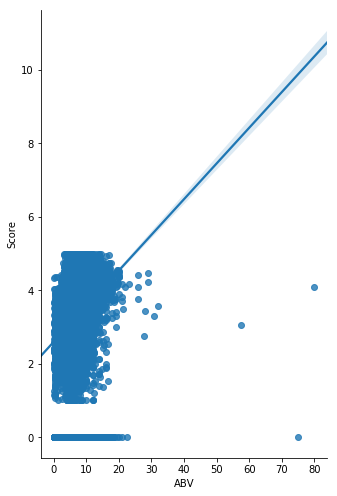

In [19]:
##sns.pairplot(beer,x_vars=['ABV'], y_vars=['Score','Ratings','Cellar Temperature','Serving Temperature'],size=7,aspect=0.7,kind='reg')
sns.pairplot(beer,x_vars=['ABV'], y_vars=['Score'],size=7,aspect=0.7,kind='reg')